In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train=pd.read_csv(r"C:\Users\ankit\Desktop\Great learning\udemy\Machine learning\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


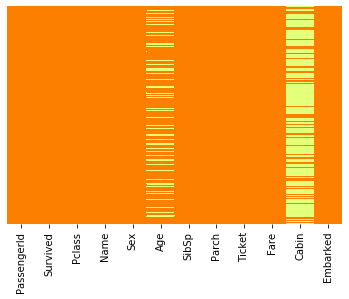

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Wistia_r")

In [7]:
sns.set_style('whitegrid')

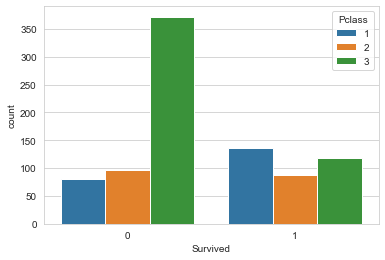

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=train)

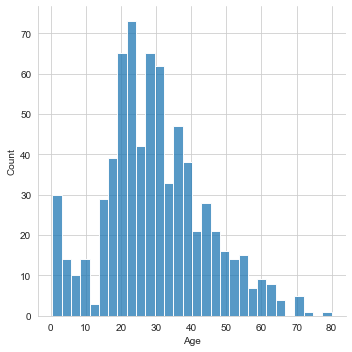

In [9]:
sns.displot(train["Age"].dropna(),kde=False,bins=30)

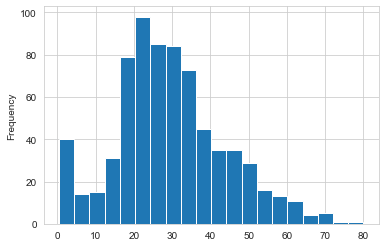

In [10]:
train["Age"].dropna().plot.hist(bins=20)

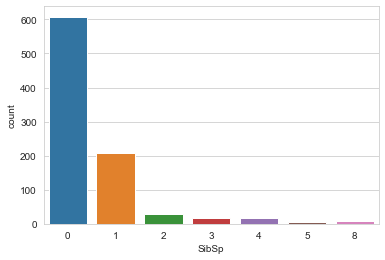

In [11]:
sns.countplot(x='SibSp',data=train)

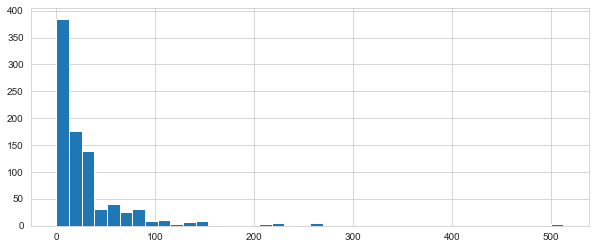

In [12]:
train["Fare"].hist(bins=40,figsize=(10,4))

In [13]:
import cufflinks as cf

In [14]:
cf.go_offline()

In [15]:
train["Fare"].iplot(kind='hist',bins=30)

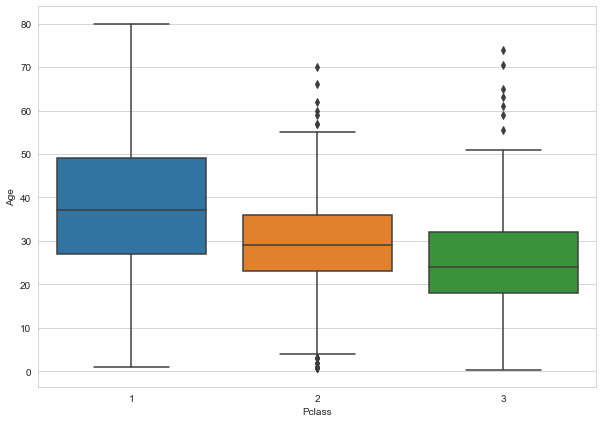

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [17]:
def inpute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
  
    

In [18]:
train["Age"]=train[["Age","Pclass"]].apply(inpute_age,axis=1)

In [19]:
train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

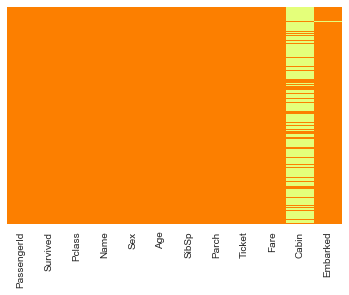

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Wistia_r")

In [21]:
train.drop("Cabin",axis=1,inplace=True)

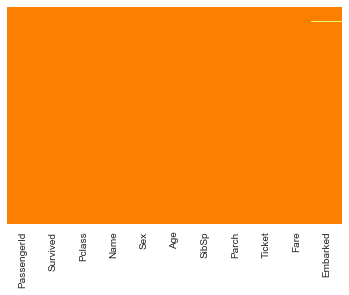

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Wistia_r")

In [23]:
train.dropna(inplace=True)

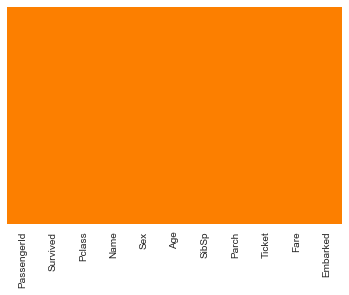

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Wistia_r")

In [25]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [26]:
embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
train=pd.get_dummies(data=train,columns=['Sex','Embarked'],drop_first=True)

In [29]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


In [30]:
train=train.rename(columns={"Sex_male": "Male", "Embarked_Q": "Q", "Embarked_S": "S"})


In [31]:
train.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)

In [32]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [33]:
brain=train.copy()

In [34]:
brain=pd.get_dummies(data=brain,columns=["Pclass"])

In [35]:
y=train["Survived"]

In [36]:
x=train.drop("Survived",axis=1)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logisticmodel=LogisticRegression()

In [41]:
logisticmodel.fit(X_train,y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [42]:
predictions=logisticmodel.predict(X_test)

In [43]:
predictions

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [44]:
# Evaluation of Logistic

In [46]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.78      0.66      0.72       105

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267



In [49]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_test,predictions))

[[143  19]
 [ 36  69]]
